In [38]:
# declare the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
# Use this function from compute_cost.py to compute the cost
from compute_cost import compute_cost
# Use this function from compute_gd.py to perform gradient descent
from compute_gdescent import compute_gradient, gradient_descent

In [39]:
# read the data
df = pd.read_csv('data_multiple/house_prices_dataset_multiple_cleaned.csv')

# display the first 5 rows of the dataset
print(df.head())

   sqft (1000s)  bedrooms  age  garage  distance_to_center (miles)  \
0         2.234         4   27       1                       25.48   
1         0.970         5    6       1                       25.76   
2         0.518         3    8       1                       12.43   
3         2.625         5    7       1                       26.69   
4         2.980         5   11       0                       25.60   

   price (1000s)  
0      24.015334  
1      20.220336  
2       6.798509  
3      30.543294  
4      51.810683  


In [40]:
# observe the correlation between the features
print(df.corr())
# not quite linear relationship :)), but I still use linear regression

                            sqft (1000s)  bedrooms       age    garage  \
sqft (1000s)                    1.000000 -0.056340  0.097592  0.124270   
bedrooms                       -0.056340  1.000000 -0.009984  0.024749   
age                             0.097592 -0.009984  1.000000  0.037558   
garage                          0.124270  0.024749  0.037558  1.000000   
distance_to_center (miles)     -0.007375 -0.043706 -0.052237  0.116140   
price (1000s)                   0.020400 -0.141213  0.000722 -0.066310   

                            distance_to_center (miles)  price (1000s)  
sqft (1000s)                                 -0.007375       0.020400  
bedrooms                                     -0.043706      -0.141213  
age                                          -0.052237       0.000722  
garage                                        0.116140      -0.066310  
distance_to_center (miles)                    1.000000      -0.161737  
price (1000s)                                -0.1

In [41]:
# create dataset
# x_train: features
# y_train: target
x_train = df[['sqft (1000s)', 'bedrooms', 'age', 'garage', 'distance_to_center (miles)']].values
y_train = df['price (1000s)'].values
# check the type of x_train and y_train
print(type(x_train))
print(type(y_train))
# check the shape of x_train and y_train
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(82, 5)
(82,)


In [42]:
# initialize the parameters
# w_init: weights  
# b_init: bias
w_init = np.zeros(x_train.shape[1])
b_init = 0
print(w_init)
print(b_init)

[0. 0. 0. 0. 0.]
0


In [43]:
# calculate the cost
cost = compute_cost(x_train, y_train, w_init, b_init)
print(cost)

2796.1493510379155


In [44]:
# compute gradient
# dj_db: derivative of cost with respect to b
# dj_dw: derivative of cost with respect to w
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -63.68549294130565
dj_dw at initial w,b: [ -113.98642739  -190.46049618 -1618.94022852   -31.32017807
  -965.73391965]


In [47]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost  2794.35   
Iteration  100: Cost  2623.41   
Iteration  200: Cost  2469.81   
Iteration  300: Cost  2331.81   
Iteration  400: Cost  2207.80   
Iteration  500: Cost  2096.37   
Iteration  600: Cost  1996.24   
Iteration  700: Cost  1906.26   
Iteration  800: Cost  1825.40   
Iteration  900: Cost  1752.73   
b,w found by gradient descent: 0.03,[0.04604611 0.07645398 0.62287775 0.01246462 0.38023285] 


In [48]:
# experiment with new data
x1_test = np.array([[2.5, 3, 10, 1, 5]])
x2_test = np.array([[3.0, 4, 5, 2, 10]])
# predict the price
y1_test = np.dot(x1_test, w_final) + b_final
y2_test = np.dot(x2_test, w_final) + b_final
print(f"Predicted price for x1_test: {y1_test}")
print(f"Predicted price for x2_test: {y2_test}")

Predicted price for x1_test: [8.51267389]
Predicted price for x2_test: [7.41139104]


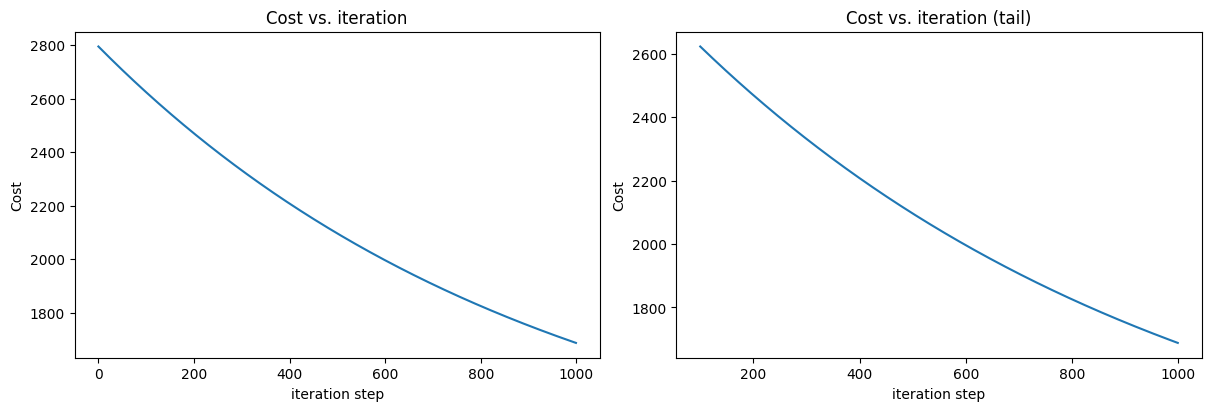

In [49]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()